<a href="https://colab.research.google.com/github/linlills/NeuralNetworks/blob/main/Vdovina_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# загрузка данных
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
import numpy as np

# векторизация данных
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  results[i,sequence] = 1.
 return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(train_labels)

# векторизация меток
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels) 


2113536/2110848 [==============================] - 0s 0us/step


Epoch 1/35
16/16 [==============================] - 1s 77ms/step - loss: 2.8995 - accuracy: 0.3826 - val_loss: 1.8867 - val_accuracy: 0.6000
Epoch 2/35
16/16 [==============================] - 1s 64ms/step - loss: 1.8887 - accuracy: 0.5734 - val_loss: 1.4724 - val_accuracy: 0.6590
Epoch 3/35
16/16 [==============================] - 1s 64ms/step - loss: 1.5725 - accuracy: 0.6388 - val_loss: 1.3136 - val_accuracy: 0.7070
Epoch 4/35
16/16 [==============================] - 1s 64ms/step - loss: 1.3975 - accuracy: 0.6789 - val_loss: 1.2277 - val_accuracy: 0.7200
Epoch 5/35
16/16 [==============================] - 1s 65ms/step - loss: 1.2581 - accuracy: 0.7068 - val_loss: 1.1585 - val_accuracy: 0.7410
Epoch 6/35
16/16 [==============================] - 1s 64ms/step - loss: 1.1520 - accuracy: 0.7263 - val_loss: 1.1109 - val_accuracy: 0.7580
Epoch 7/35
16/16 [==============================] - 1s 64ms/step - loss: 1.0710 - accuracy: 0.7461 - val_loss: 1.0707 - val_accuracy: 0.7810
Epoch 8/35
16

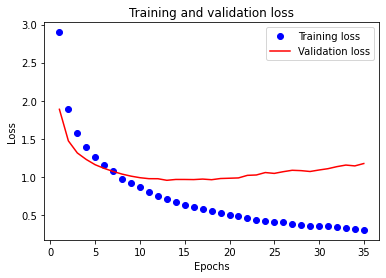

In [ ]:
from keras import models
from keras import layers
from keras.layers import Dropout

model = models.Sequential()
model.add(layers.Dense(100, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(46, activation='softmax')) #для каждого входного образца сеть будет выводить 46-мерный вектор

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) # функция потерь определяет расстояние между распределениями вероятностей на выходе сети и истинным распределением меток

# создание проверочного набора для 1000 образцов из обучающей выборки
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# обучение модели в течение 35 эпох
history = model.fit(partial_x_train, partial_y_train, epochs=35, batch_size=512, validation_data=(x_val, y_val))

# графики потерь на этапах обучения и проверки
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss',c='red')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



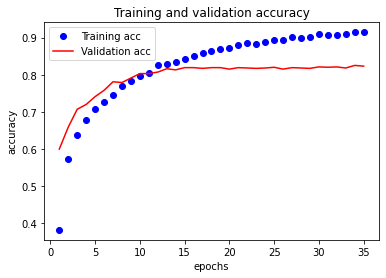

In [ ]:
# графики точности на этапах обучения
epochs= range(1, len(loss) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation acc', c='red')
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()